# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

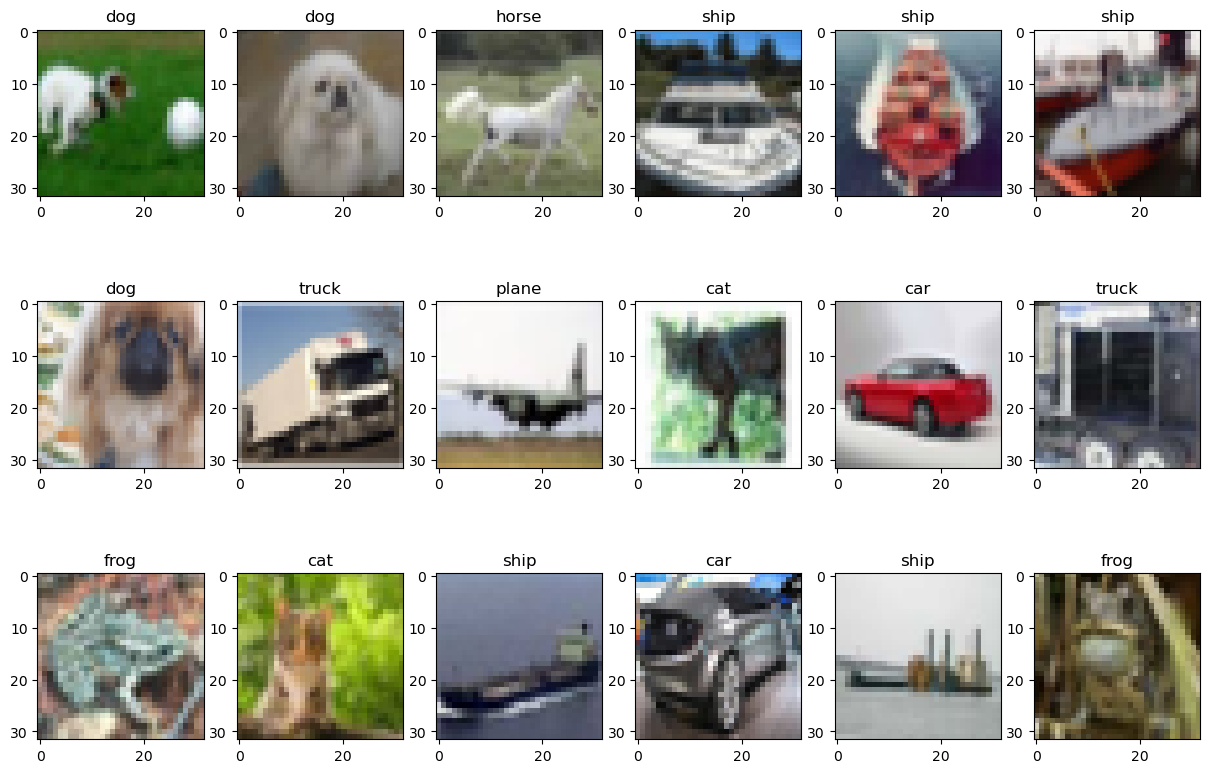

In [31]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, x_train.shape[0])
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class'), Text(0, 0.5, 'Counts'))

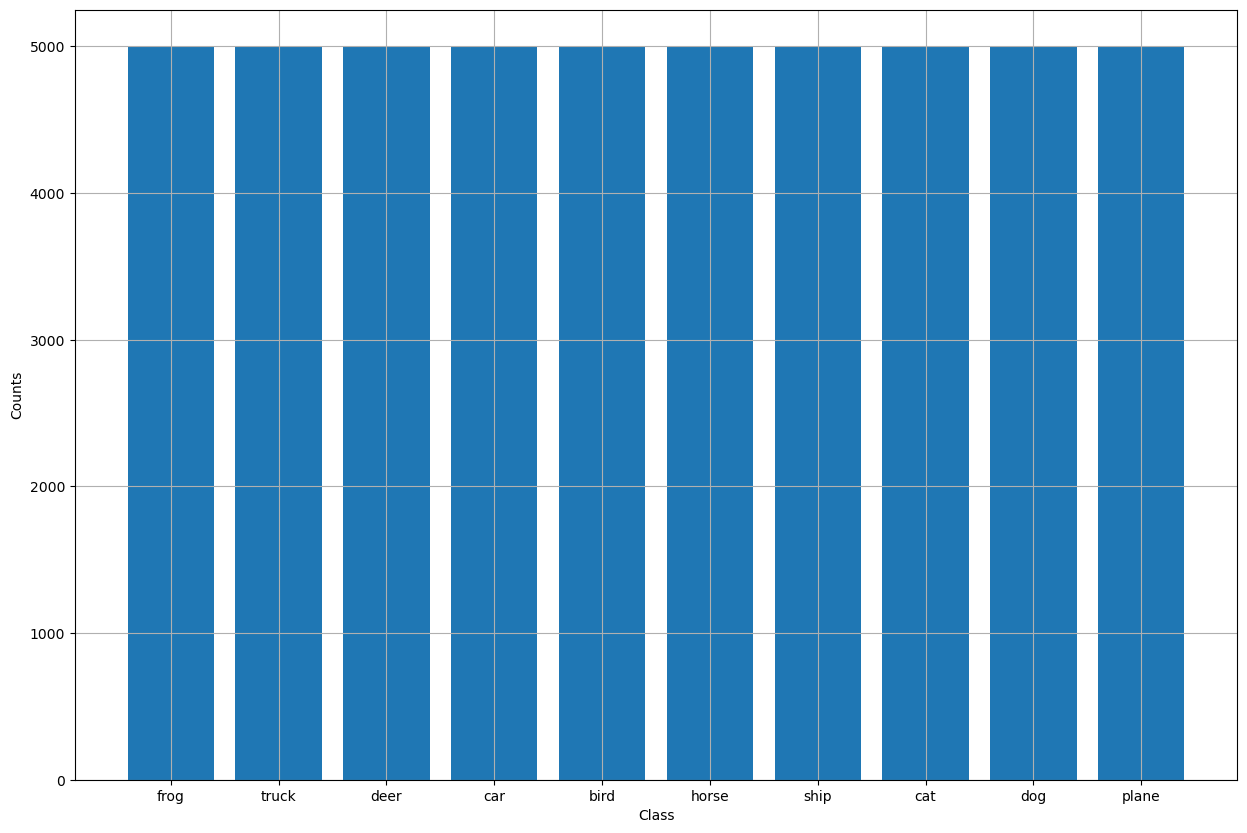

In [32]:
# Compute the class histogram
from collections import Counter

# Flatten the y_train array to a 1D array
y_train_flat = y_train.flatten()

# Compute the class histogram
class_counts = Counter(y_train_flat)

# Map the counts to the class names
class_counts_mapped = {classes[key]: class_counts[key] for key in class_counts}

plt.bar(class_counts_mapped.keys(), class_counts_mapped.values()), plt.grid(True)
plt.xlabel('Class'), plt.ylabel('Counts')

### Dataset is balanced. Each class has exactly 5000 images.

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [33]:
from tensorflow.keras.utils import to_categorical

# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32')/ 255.0

# One-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the classifier
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Show the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1152)             

### Step 3: Training

Compile the model and train it.

In [45]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 6s 16ms/step - loss: 1.8348 - accuracy: 0.3378 - val_loss: 1.5951 - val_accuracy: 0.4402
Epoch 2/25
352/352 [==============================] - 6s 16ms/step - loss: 1.5329 - accuracy: 0.4570 - val_loss: 1.3837 - val_accuracy: 0.5092
Epoch 3/25
352/352 [==============================] - 7s 19ms/step - loss: 1.4154 - accuracy: 0.5026 - val_loss: 1.2946 - val_accuracy: 0.5560
Epoch 4/25
352/352 [==============================] - 5s 16ms/step - loss: 1.3506 - accuracy: 0.5243 - val_loss: 1.2516 - val_accuracy: 0.5744
Epoch 5/25
352/352 [==============================] - 6s 16ms/step - loss: 1.3040 - accuracy: 0.5423 - val_loss: 1.1829 - val_accuracy: 0.5968
Epoch 6/25
352/352 [==============================] - 7s 19ms/step - loss: 1.2593 - accuracy: 0.5595 - val_loss: 1.1553 - val_accuracy: 0.6088
Epoch 7/25
352/352 [==============================] - 6s 17ms/step - loss: 1.2342 - accuracy: 0.5702 - val_loss: 1.1276 - val_accuracy: 0.6168

Train Acc      0.637844443321228
Validation Acc 0.6725999712944031


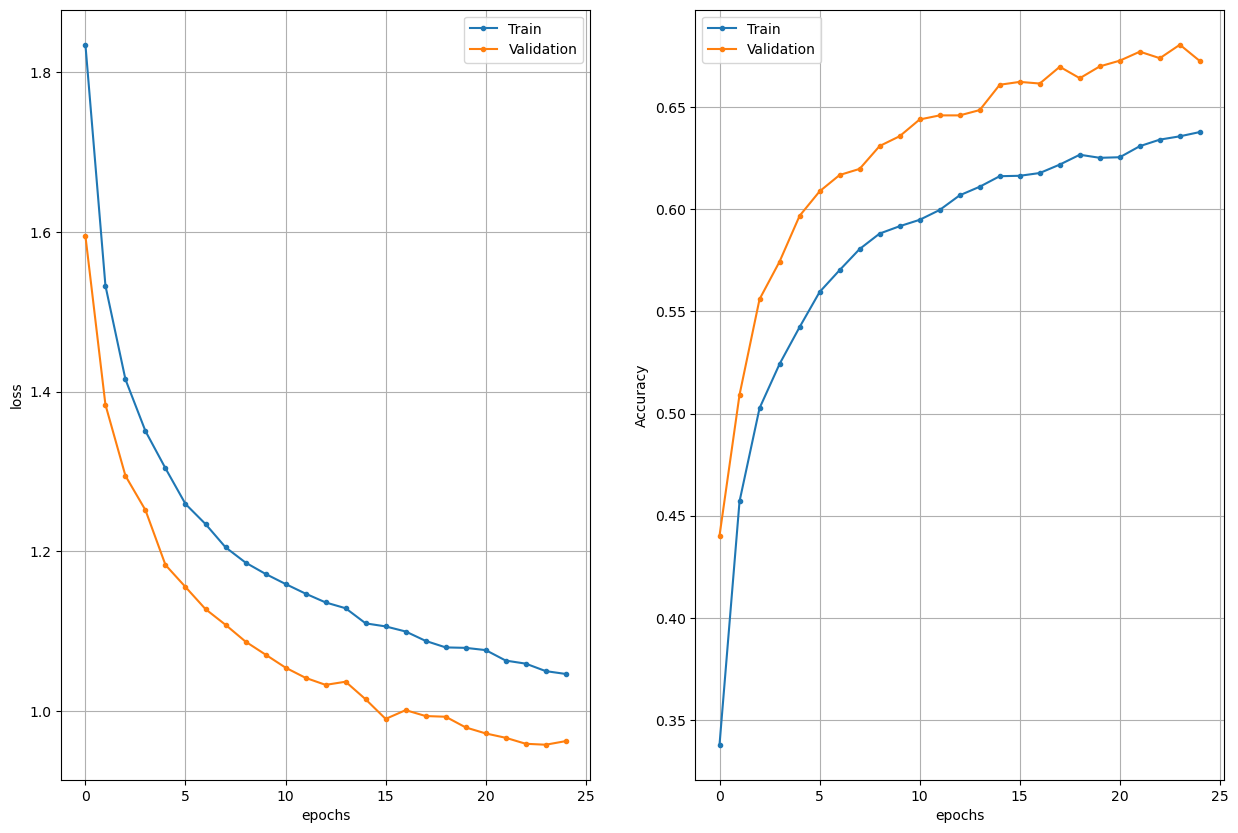

In [47]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [48]:
from sklearn.metrics import accuracy_score
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step
Test accuracy: 0.6658


In [38]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    # Get the indices of all instances of the current class in the true labels
    class_indices = np.where(y_true == class_id)[0]
    # Compute the accuracy for the current class
    acc = np.mean(y_true[class_indices] == y_pred[class_indices])
    print(class_name, acc)

plane 0.74
car 0.856
bird 0.636
cat 0.45
deer 0.425
dog 0.592
frog 0.752
horse 0.741
ship 0.698
truck 0.656


In [39]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0111 - accuracy: 0.6546
Test loss   1.011123538017273
Test metric 0.6546000242233276


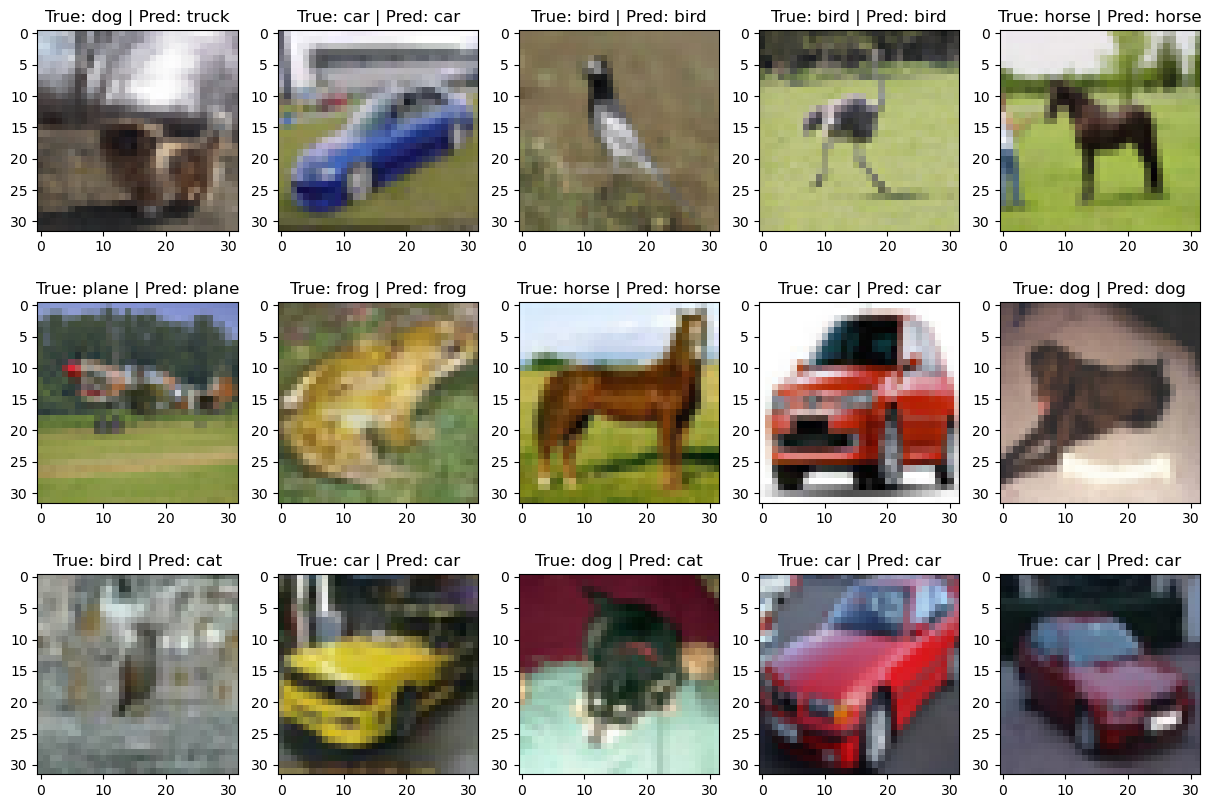

In [40]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?  
  0.6546
* What modifications would you do in order to improve the classification accuracy?  
  We can apply data augmentation, add more layers, regularization etc.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?  
  I added Dropout(0.5) and it helped a little **0.6658**
  
  